<a href="https://colab.research.google.com/github/vryzasdimitris/6-IOYLIOY/blob/main/Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [5]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_9933573c2430f5caaf27c2ec57eae176,9933573c2430f5caaf27c2ec57eae176,332,224,271,5,0,81920,25088,0,...,5,3.761180,1.970951,5.674116,2242.000000,20,9544,0,0,0
1,rdpcorekmts.dll,5b236296e233caa6bf86be0c6501a224,34404,240,8226,9,0,114176,46592,0,...,3,3.675057,2.785668,4.634378,8821.333333,216,25316,0,16,1
2,VirusShare_837fc0baf419c85073e3d8215d56905e,837fc0baf419c85073e3d8215d56905e,332,224,33167,2,25,37888,15360,0,...,14,3.428399,2.413567,5.084524,722.000000,44,2216,0,15,0
3,VirusShare_c25824932f6e416f405b9f9734427a52,c25824932f6e416f405b9f9734427a52,332,224,258,10,0,117248,389632,0,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0
4,VirusShare_9c63b4b0c654635ca391401901438551,9c63b4b0c654635ca391401901438551,332,224,271,6,0,24064,141824,2048,...,13,3.914716,0.000000,6.324741,2936.384615,104,16936,0,11,0


In [6]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

([<matplotlib.patches.Wedge at 0x7fe29b58d2d0>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Malware'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Legitimate')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

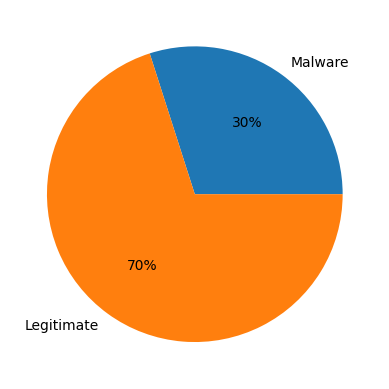

In [7]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

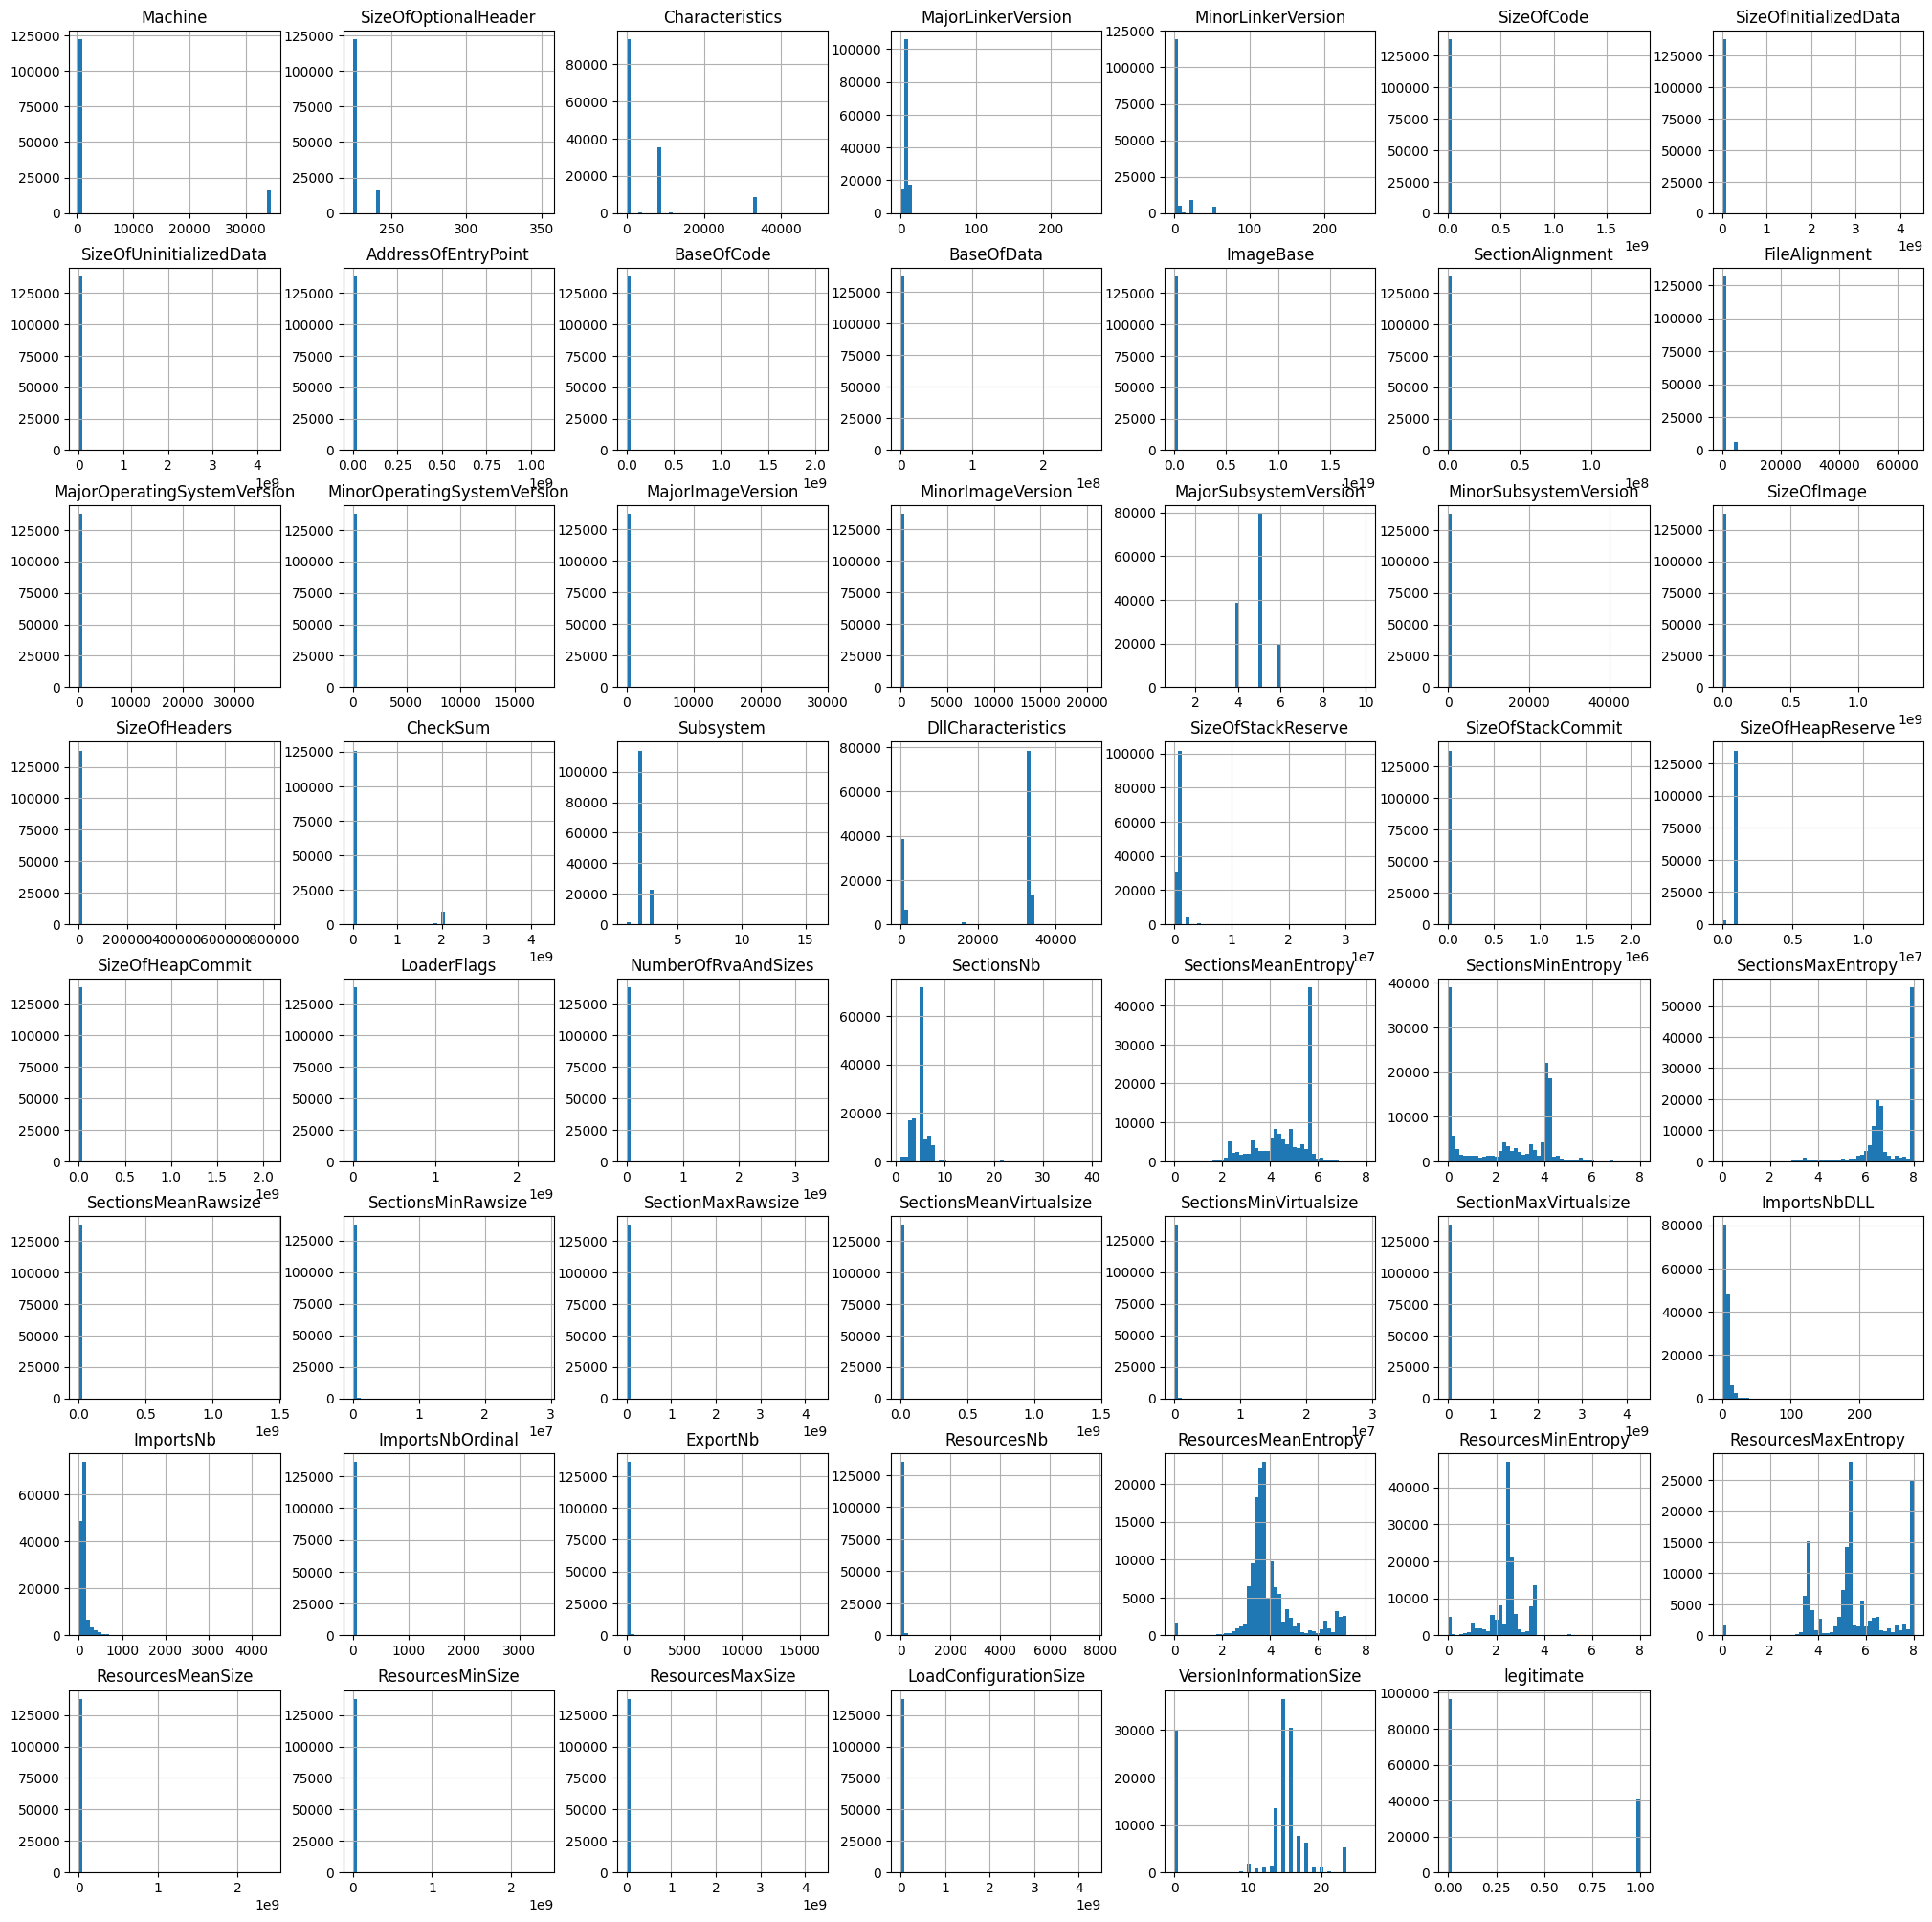

In [8]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

In [9]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

ValueError: could not convert string to float: 'VirusShare_9933573c2430f5caaf27c2ec57eae176'

<Figure size 1500x1300 with 0 Axes>

In [10]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [11]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [12]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,VirusShare_9933573c2430f5caaf27c2ec57eae176,9933573c2430f5caaf27c2ec57eae176,332,224,271,5,0,81920,25088,0,...,0,5,3.76118,1.970951,5.674116,2242.0,20,9544,0,0
1,rdpcorekmts.dll,5b236296e233caa6bf86be0c6501a224,34404,240,8226,9,0,114176,46592,0,...,4,3,3.675057,2.785668,4.634378,8821.333333,216,25316,0,16
2,VirusShare_837fc0baf419c85073e3d8215d56905e,837fc0baf419c85073e3d8215d56905e,332,224,33167,2,25,37888,15360,0,...,0,14,3.428399,2.413567,5.084524,722.0,44,2216,0,15
3,VirusShare_c25824932f6e416f405b9f9734427a52,c25824932f6e416f405b9f9734427a52,332,224,258,10,0,117248,389632,0,...,0,5,3.312743,2.67442,3.764385,2517.6,48,7336,72,14
4,VirusShare_9c63b4b0c654635ca391401901438551,9c63b4b0c654635ca391401901438551,332,224,271,6,0,24064,141824,2048,...,0,13,3.914716,0.0,6.324741,2936.384615,104,16936,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_e323be4d571a9ee74f2a67f477934fa7,e323be4d571a9ee74f2a67f477934fa7,332,224,258,10,0,120320,385024,0,...,0,6,3.671986,2.458492,5.317552,2739.5,48,9640,72,15
138043,VirusShare_5dacef78400bc16cb5c66987cdc9a9c4,5dacef78400bc16cb5c66987cdc9a9c4,332,224,258,9,0,3530752,24576,6332416,...,0,66,6.867882,2.458492,7.83107,3100.954545,20,17207,72,18
138044,VirusShare_a2c53193778a23a8e29c78d188ae2a7e,a2c53193778a23a8e29c78d188ae2a7e,332,224,258,10,0,118784,383488,0,...,0,16,6.378131,2.458492,7.992688,20821.9375,48,33945,72,14
138045,VirusShare_9e4d3f6b1fec49701b17d171cb571cfe,9e4d3f6b1fec49701b17d171cb571cfe,332,224,258,10,0,117760,392192,0,...,0,5,3.425849,2.458492,4.035538,3146.4,48,9640,72,15


In [13]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [14]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [15]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [16]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [1 1 1 ... 1 1 1]


In [17]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [18]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 legitimate
0    94378
1    36768
Name: count, dtype: int64


In [19]:
# Εκτύπωση καθαρού συνόλου
clean_data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,50430,70652,0,0,18,5,0,228,83,0,...,5,26335,1560,17553,8430,20,2020,0,0,0
1,105714,36597,2,2,67,9,0,297,131,0,...,3,24470,3920,13561,12542,179,2855,0,10,1
2,39748,56421,0,0,94,2,24,132,63,0,...,14,13263,2576,15650,3125,41,899,0,9,0
3,72013,98659,0,0,11,10,0,303,826,0,...,5,9665,3468,12671,8834,44,1824,1,8,0
4,52153,72834,0,0,18,6,0,97,330,8,...,13,28385,0,18824,9422,83,2474,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,91364,123279,0,0,11,10,0,309,819,0,...,6,24431,2649,16569,9163,44,2027,1,9,0
138043,27193,37624,0,0,11,9,0,3141,82,411,...,66,42557,2649,20746,9649,20,2494,1,12,0
138044,55489,77131,0,0,11,10,0,306,816,0,...,16,42322,2649,22275,14048,44,3144,1,8,0
138045,53147,74126,0,0,11,10,0,304,831,0,...,5,13150,2649,13090,9699,44,2027,1,9,0


In [20]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [21]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.5939348 , -1.25818239,  2.85628609, ..., -1.06270179,
        -0.76929834,  0.96734682],
       [ 1.35786588, -0.36543651,  2.85628609, ..., -1.17099   ,
        -0.76929834,  0.52134797],
       [-0.83803365, -0.734302  , -0.35013072, ..., -0.06103585,
         0.47563788,  0.29834855],
       ...,
       [ 0.7579281 ,  1.21336001, -0.35013072, ..., -0.06103585,
        -0.76929834, -1.70864624],
       [ 1.36814793, -1.58988713,  2.85628609, ...,  1.09910064,
        -0.76929834,  0.52134797],
       [-0.49108544, -0.27181649, -0.35013072, ...,  1.79637107,
        -0.76929834,  0.96734682]])

In [22]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [23]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18934
           1       1.00      1.00      1.00      7296

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

RandomForest - Πίνακας Συγχυσης:
 [[18926     8]
 [    0  7296]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18934
           1       1.00      1.00      1.00      7296

    accuracy                           1.00     26230
   macro avg       1.00      1.00      1.00     26230
weighted avg       1.00      1.00      1.00     26230

GradientBoosting - Πίνακας Συγχυσης:
 [[18934     0]
 [    0  7296]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [24]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy  Recall  Precision  F1 Score
RandomForest      0.999695     1.0   0.998905  0.999452
GradientBoosting  1.000000     1.0   1.000000  1.000000
AdaBoost          0.999886     1.0   0.999589  0.999794
